In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 로드
test_data = pd.read_csv('C:/Users/admin/Desktop/개별1/data/test.csv')
train_data = pd.read_csv('C:/Users/admin/Desktop/개별1/data/train.csv')
sample_data = pd.read_csv('C:/Users/admin/Desktop/개별1/data/sample_submission.csv')

In [3]:
## train, test set 설정

train_X = train_data.iloc[:,4:]
train_Y = train_data.iloc[:,0:4]
test_X = test_data.iloc[:,1:]
test_Y = sample_data.iloc[:,1:]

## PCA : 주성분 분석을 통한 차원 축소

서로 연관 가능성이 있는 고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간(주성분)의 표본으로 변환하는 방법

주성분 분석은 데이터를 한개의 축으로 사상시켰을 때 그 분산이 가장 커지는 축을 첫 번째 주성분, 두 번째로 커지는 축을 두 번째 주성분으로 놓이도록 새로운 좌표계로 데이터를 선형 변환한다.

한계점
1) 데이터 분포가 가우시안이 아니거나 다중 가우시안이면 적용이 어려움 - 대안 : 커널 PCA, LLE
2) y와 상관없이 x의 공분산이 최대로 되는 쪽으로 추출한 거라, y를 잘 분류/예측할 거라는 보장은 없음 - 대안 : PLS

In [4]:
train_X.head()

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
0,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,0.246511,0.259407,0.260862,0.242524,...,0.354750,0.369223,0.388184,0.408496,0.414564,0.429403,0.419225,0.443250,0.433414,0.465502
1,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,0.191318,0.195369,0.200536,0.197588,...,0.557203,0.573656,0.587998,0.612754,0.627825,0.633393,0.637706,0.625981,0.653231,0.637853
2,0.189196,0.165869,0.177655,0.156822,0.175094,0.177755,0.157582,0.158885,0.156911,0.166162,...,0.699864,0.708688,0.721982,0.713464,0.743030,0.741709,0.747743,0.746037,0.737356,0.750391
3,0.131003,0.120076,0.138975,0.117931,0.130566,0.131262,0.126962,0.134453,0.106717,0.127309,...,0.764786,0.763788,0.770017,0.787571,0.778866,0.776969,0.774712,0.801526,0.805305,0.784057
4,0.091033,0.086893,0.108125,0.080405,0.105917,0.077083,0.097895,0.086765,0.078676,0.075729,...,0.786677,0.802271,0.806557,0.799614,0.789333,0.804087,0.787763,0.794948,0.819105,0.801781


In [5]:
train_X.describe()

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
count,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,...,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000
mean,0.292653,0.292893,0.293125,0.293363,0.293666,0.293994,0.294344,0.294792,0.295325,0.295757,...,0.600336,0.606206,0.612238,0.618456,0.623942,0.625395,0.627100,0.628997,0.631166,0.633594
std,0.181642,0.181857,0.182055,0.182197,0.182361,0.182529,0.182693,0.182858,0.183057,0.183192,...,0.199727,0.198644,0.197473,0.196177,0.195028,0.194909,0.194730,0.194493,0.194146,0.193725
min,-0.014902,-0.014798,-0.014897,-0.014709,-0.014903,-0.014662,-0.014924,-0.014789,-0.014775,-0.014945,...,-0.011992,-0.008661,-0.011430,-0.009827,-0.007632,-0.007411,-0.007073,-0.007101,-0.005519,-0.006074
25%,0.135139,0.135180,0.135258,0.135478,0.135585,0.135705,0.135858,0.136423,0.136704,0.136993,...,0.469345,0.476970,0.484727,0.492739,0.500232,0.501650,0.503811,0.506252,0.509036,0.512067
50%,0.286510,0.286874,0.287194,0.287553,0.287830,0.288151,0.288705,0.289222,0.289905,0.290652,...,0.643685,0.649886,0.656258,0.662860,0.668727,0.670287,0.672145,0.674283,0.676692,0.679339
75%,0.435696,0.435956,0.436112,0.436326,0.436634,0.437142,0.437395,0.437924,0.438657,0.439172,...,0.760737,0.765462,0.770333,0.775263,0.779555,0.780846,0.782387,0.783979,0.785774,0.787759
max,0.748205,0.753103,0.749494,0.747389,0.748827,0.750392,0.751105,0.749795,0.751538,0.750883,...,0.935423,0.934867,0.938873,0.937817,0.942214,0.940367,0.940387,0.941548,0.942411,0.943648


In [6]:
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action='ignore')

In [7]:
# 시각화를 위해 2차원으로 축소
pca = PCA(n_components = 2)

In [8]:
pc1 = pca.fit_transform(train_X)

In [9]:
pc1 = pd.DataFrame(pc1, columns = ['pc1','pc2'])

In [10]:
pc1 = pd.concat((pc1,train_Y), axis=1)

In [11]:
pc1.describe()

,pc1,pc2,layer_1,layer_2,layer_3,layer_4
count,8.100000e+05,8.100000e+05,810000.000000,810000.000000,810000.000000,810000.000000
mean,6.596644e-18,-1.440033e-16,155.000000,155.000000,155.000000,155.000000
std,8.703573e-01,8.695325e-01,86.554468,86.554468,86.554468,86.554468
min,-2.811405e+00,-2.711998e+00,10.000000,10.000000,10.000000,10.000000
25%,-5.614895e-01,-5.572465e-01,80.000000,80.000000,80.000000,80.000000
50%,1.175513e-02,1.115585e-03,155.000000,155.000000,155.000000,155.000000
75%,5.599450e-01,5.719718e-01,230.000000,230.000000,230.000000,230.000000
max,2.943909e+00,2.894579e+00,300.000000,300.000000,300.000000,300.000000


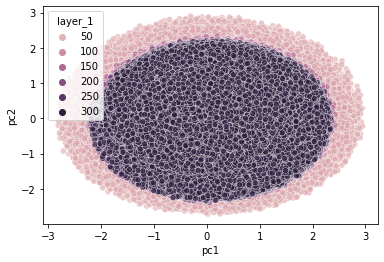

In [12]:
# 2차원으로 만들어 시각화 하기 위해 우선 2개의 주성분으로 scatter plot을 도시하였다. 
# hue : hue semantic : layer1의 변수(10~300)을 색으로 추가하여 변수 추가
scat = sns.scatterplot(x = 'pc1', y = 'pc2',data = pc1, alpha = 0.7, hue = 'layer_1')

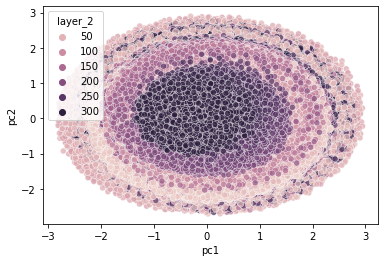

In [13]:
scat = sns.scatterplot(x = 'pc1', y = 'pc2',data = pc1, alpha = 0.7 , hue = 'layer_2')


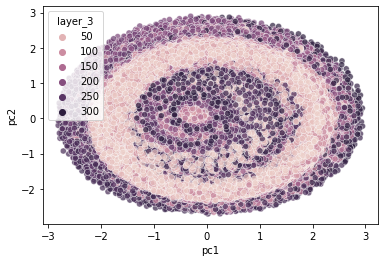

In [14]:
scat = sns.scatterplot(x = 'pc1', y = 'pc2',data = pc1, alpha = 0.7 , hue = 'layer_3')

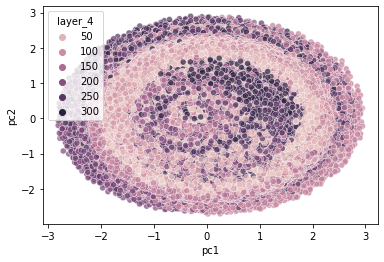

In [15]:
scat = sns.scatterplot(x = 'pc1', y = 'pc2',data = pc1, alpha = 0.7 , hue = 'layer_4')

In [16]:
train_X.describe()

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
count,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,...,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000
mean,0.292653,0.292893,0.293125,0.293363,0.293666,0.293994,0.294344,0.294792,0.295325,0.295757,...,0.600336,0.606206,0.612238,0.618456,0.623942,0.625395,0.627100,0.628997,0.631166,0.633594
std,0.181642,0.181857,0.182055,0.182197,0.182361,0.182529,0.182693,0.182858,0.183057,0.183192,...,0.199727,0.198644,0.197473,0.196177,0.195028,0.194909,0.194730,0.194493,0.194146,0.193725
min,-0.014902,-0.014798,-0.014897,-0.014709,-0.014903,-0.014662,-0.014924,-0.014789,-0.014775,-0.014945,...,-0.011992,-0.008661,-0.011430,-0.009827,-0.007632,-0.007411,-0.007073,-0.007101,-0.005519,-0.006074
25%,0.135139,0.135180,0.135258,0.135478,0.135585,0.135705,0.135858,0.136423,0.136704,0.136993,...,0.469345,0.476970,0.484727,0.492739,0.500232,0.501650,0.503811,0.506252,0.509036,0.512067
50%,0.286510,0.286874,0.287194,0.287553,0.287830,0.288151,0.288705,0.289222,0.289905,0.290652,...,0.643685,0.649886,0.656258,0.662860,0.668727,0.670287,0.672145,0.674283,0.676692,0.679339
75%,0.435696,0.435956,0.436112,0.436326,0.436634,0.437142,0.437395,0.437924,0.438657,0.439172,...,0.760737,0.765462,0.770333,0.775263,0.779555,0.780846,0.782387,0.783979,0.785774,0.787759
max,0.748205,0.753103,0.749494,0.747389,0.748827,0.750392,0.751105,0.749795,0.751538,0.750883,...,0.935423,0.934867,0.938873,0.937817,0.942214,0.940367,0.940387,0.941548,0.942411,0.943648


In [17]:
## 본격적인 차원 축소 by PCA
# explained_variance_ratio : 차원을 축소하면서 설명력이 얼마나 유실되는지를 보여주는 지표(0.8-> 80% 만큼의 정보를 유지하는것)
# 높을 수록 원 데이터의 설명력을 유지할 수 있다. 
pca.explained_variance_ratio_

array([0.08371785, 0.08355926])

In [18]:
# 최적의 주성분 개수 구하기
# explained_variance_ratio_ 를 활용하여 설명력을 99% 유지하는 수준의 주성분 개수를 설정한다.
best_n =[]

for n in range(19,100):
    pca = PCA(n_components = n)
    principleComponents = pca.fit_transform(train_X)
    if sum(pca.explained_variance_ratio_)>0.99:
        best_n.append(n)
        break

In [19]:
# 최적의 주성분 개수는 28개
best_n

[27]

In [20]:
pca = PCA(n_components = 28)

In [44]:
train_X_pca = pca.fit_transform(train_X)

In [40]:
test_X_pca = pca.fit_transform(test_X)

In [23]:
train_X_pca_df = pd.DataFrame(train_X_pca, columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18','pc19','pc20','pc21','pc22','pc23','pc24','pc25','pc26','pc27','pc28'])

In [24]:
train_X_pca = train_X_pca_df
train_X_pca

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28
0,0.008324,-0.062078,0.014270,0.123255,-0.084904,-0.043795,0.077551,0.076945,-0.120134,0.388289,...,0.223542,0.027666,-0.098817,-0.033910,0.055378,0.029293,-0.021151,0.027938,0.031993,0.009576
1,-0.033758,-0.020977,0.028246,0.075608,0.076802,-0.068609,-0.203226,0.083704,0.010448,-0.063823,...,0.135999,0.001786,-0.075527,0.002523,0.017491,-0.003795,-0.013287,0.006397,0.025517,-0.015008
2,-0.071551,0.016416,0.073886,0.010123,0.153371,-0.006377,-0.265547,0.182228,0.240479,-0.224570,...,0.079891,-0.065007,-0.029348,0.043958,0.028653,-0.016807,-0.015999,-0.008457,0.004568,-0.021059
3,-0.084431,0.023044,0.082189,-0.055214,0.162173,0.011903,-0.090562,0.202713,0.235205,-0.142302,...,0.054097,-0.087580,-0.019083,0.056334,0.030234,-0.038543,-0.006502,-0.034409,0.001260,-0.029243
4,-0.091333,0.011562,0.109630,-0.091761,0.075876,0.042484,0.144232,0.099591,0.079397,-0.067701,...,0.045514,-0.095772,-0.023149,0.058019,0.003067,-0.056190,-0.009761,-0.058231,0.005075,-0.025879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809995,-0.368985,0.718359,-0.634605,0.435661,-0.353267,-0.249673,-0.740467,-0.024588,0.068415,-0.897583,...,-0.470749,-1.112785,-0.343116,-0.818780,-0.977663,0.928093,-0.093416,0.126499,-0.492209,0.288039
809996,-0.604514,0.620691,-0.631162,0.688357,-0.229687,-0.173232,-0.857539,0.036534,0.420488,-0.712551,...,-0.392882,-0.696019,-0.837415,-0.428731,-0.637490,1.226307,0.180292,-0.041471,-0.339714,0.590848
809997,-0.780121,0.485783,-0.502253,0.927300,-0.154637,-0.124242,-0.918018,0.160970,0.721138,-0.423233,...,-0.062192,-0.188611,-1.255428,-0.190876,-0.135792,1.283108,0.593135,-0.027839,-0.042127,0.668902
809998,-0.889734,0.283754,-0.257195,1.104160,-0.200056,-0.047987,-0.885406,0.356669,0.825001,-0.037471,...,0.445340,0.373750,-1.517603,0.031199,0.211251,0.901615,0.972045,0.135919,0.145643,0.506860


In [25]:
train_X_pca.describe()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28
count,8.100000e+05,8.100000e+05,8.100000e+05,8.100000e+05,8.100000e+05,8.100000e+05,8.100000e+05,8.100000e+05,8.100000e+05,8.100000e+05,...,8.100000e+05,8.100000e+05,8.100000e+05,8.100000e+05,8.100000e+05,8.100000e+05,8.100000e+05,8.100000e+05,8.100000e+05,8.100000e+05
mean,7.017706e-19,-1.423191e-16,6.456290e-18,2.021099e-17,-1.712320e-17,5.221173e-17,1.016164e-16,-2.144611e-16,1.305293e-17,9.126527e-17,...,4.765022e-17,8.975646e-17,-2.684273e-17,-1.280402e-16,-2.549138e-16,-2.232332e-16,4.533657e-16,-1.988642e-16,1.278494e-16,-2.348958e-16
std,8.703693e-01,8.695349e-01,8.355721e-01,8.339380e-01,7.801914e-01,7.721176e-01,7.587467e-01,7.338293e-01,7.222077e-01,7.117603e-01,...,2.899145e-01,2.457699e-01,2.180467e-01,1.958378e-01,1.795239e-01,1.610035e-01,1.483871e-01,1.361035e-01,1.219104e-01,1.126250e-01
min,-2.807303e+00,-2.710609e+00,-2.765788e+00,-2.737026e+00,-2.675329e+00,-2.638620e+00,-2.890933e+00,-2.580360e+00,-2.582997e+00,-2.599221e+00,...,-1.877890e+00,-1.890599e+00,-1.575406e+00,-1.145842e+00,-1.316261e+00,-9.727860e-01,-7.891240e-01,-7.289589e-01,-7.214229e-01,-7.202392e-01
25%,-5.615489e-01,-5.569724e-01,-5.737001e-01,-5.697178e-01,-5.359850e-01,-5.201367e-01,-5.150401e-01,-5.069920e-01,-4.873382e-01,-4.751972e-01,...,-1.605970e-01,-1.324687e-01,-1.214200e-01,-1.081697e-01,-9.493240e-02,-8.102317e-02,-6.955345e-02,-6.431537e-02,-5.550126e-02,-4.683189e-02
50%,1.204243e-02,1.235444e-03,-3.058070e-02,-2.162010e-02,-3.414456e-02,-1.570812e-02,-1.235270e-02,-2.505370e-02,1.387325e-02,7.362171e-03,...,-4.316123e-03,-4.075133e-04,8.446993e-04,1.610808e-03,8.659785e-04,-2.633909e-03,-1.900980e-03,-1.914738e-03,5.915438e-04,-1.283090e-03
75%,5.597111e-01,5.716997e-01,5.516251e-01,5.512488e-01,5.188946e-01,5.074862e-01,5.009419e-01,4.945974e-01,4.967863e-01,4.884638e-01,...,1.523931e-01,1.417557e-01,1.252915e-01,1.018689e-01,9.128695e-02,8.322839e-02,7.045456e-02,6.517596e-02,5.473657e-02,4.934262e-02
max,2.951992e+00,2.895947e+00,2.775265e+00,2.791370e+00,2.978662e+00,2.880186e+00,2.950746e+00,2.858146e+00,2.798064e+00,2.612143e+00,...,2.277239e+00,2.115168e+00,1.859054e+00,1.308351e+00,1.373866e+00,1.478017e+00,1.248838e+00,8.285444e-01,7.606058e-01,7.262439e-01


In [26]:
train_Y

,layer_1,layer_2,layer_3,layer_4
0,10,10,10,10
1,10,10,10,20
2,10,10,10,30
3,10,10,10,40
4,10,10,10,50
...,...,...,...,...
809995,300,300,300,260
809996,300,300,300,270
809997,300,300,300,280
809998,300,300,300,290


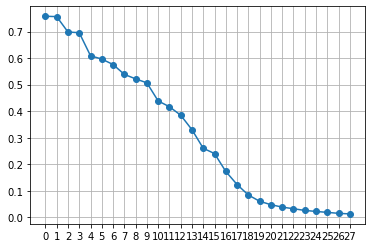

In [46]:
plt.xticks(range(len(pca.explained_variance_)))

plt.plot(pca.explained_variance_, marker='o')
plt.grid()

## PCA data modeling

In [27]:
## 모듈 임포트
from sklearn.model_selection import train_test_split  ## train test 

from sklearn.linear_model import LinearRegression   ## 회귀 분석
from sklearn.linear_model import LogisticRegression ## Logistic Regression
from sklearn.ensemble import RandomForestRegressor  ## RandomForet

import lightgbm as lgb
from sklearn.multioutput import MultiOutputRegressor  ## MultiOutputRegressor

from sklearn.metrics import accuracy_score     ## 정확도 검증

In [28]:
## 모델 생성

rf = RandomForestRegressor()
model = lgb.LGBMRegressor()
mor = MultiOutputRegressor(model)

In [29]:
# MultiOutputRegressor 결과
# r2 score가 약 4% 이상 상승했음을 확인할 수 있다. (0.44343734945399443 -> 0.48432194216414964)

mor.fit(train_X_pca, train_Y)
mor.score(train_X_pca, train_Y)

0.48672066076708365

In [30]:
mor_y_preds = mor.predict(test_X_pca)
mor_y_preds

array([[179.81735406, 155.55332608, 181.73818249, 241.24192773],
       [164.85872651, 169.70235157, 192.41825244, 155.50693013],
       [199.8771276 , 187.5782358 , 199.37447967, 151.01536666],
       ...,
       [ 67.13026669, 132.21466974, 210.2885982 , 192.17249546],
       [ 83.86010226, 104.33828144,  38.63262946, 149.70541739],
       [ 70.94176907,  90.56542736,  79.07258672, 137.42765709]])

In [31]:
sample_data['layer_1'] = mor_y_preds[:,0]
sample_data['layer_2'] = mor_y_preds[:,1]
sample_data['layer_3'] = mor_y_preds[:,2]
sample_data['layer_4'] = mor_y_preds[:,3]
mor_layer_pca = sample_data
mor_layer_pca

,id,layer_1,layer_2,layer_3,layer_4
0,0,179.817354,155.553326,181.738182,241.241928
1,1,164.858727,169.702352,192.418252,155.506930
2,2,199.877128,187.578236,199.374480,151.015367
3,3,148.330808,176.158287,174.212749,158.850927
4,4,270.767614,230.053481,275.267629,209.447096
...,...,...,...,...,...
9995,9995,123.034118,84.762627,75.526363,81.911552
9996,9996,142.994892,120.560342,89.424872,193.259294
9997,9997,67.130267,132.214670,210.288598,192.172495
9998,9998,83.860102,104.338281,38.632629,149.705417


In [32]:
mor_layer_pca.to_csv('C:/Users/admin/Desktop/개별1/data/mor_layer_pca.csv', header=['id','layer_1','layer_2','layer_3','layer_4'], index=False)